# Fast Food Marketing Campaign AB Testing 

Introduction 

In [1]:
# import libraries and packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


import warnings 
warnings.filterwarnings("ignore")

# Stats library
from scipy.stats import shapiro, levene

In [5]:
# new packages or settings to be added


In [2]:
# import data 
dataset = pd.read_csv("WA_Marketing-Campaign.csv")

In [5]:
dataset.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [6]:
# Check the dimensions of the dataset
dataset.shape

(548, 7)

###### <ins>Observations<ins>
    
    We have 548 observations in the dataset for performing the statistical test to understand the impact of the promotions  on the sales of the store of Fast Food chain client. 


In [7]:
# check for duplicate 
dataset.duplicated().sum()

0

###### <ins>Observation<ins>
    We don't have any duplicate observations in the dataset, but as we are not using any unique identifier we will have to  use the duplicate function without any subset to rely on.

In [8]:
# check memory usage for dataset
dataset.info(memory_usage = "deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    int64  
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(5), object(1)
memory usage: 59.3 KB


###### <ins>Observations<ins>
    
    We have 7 features, wherein we have 1 feature with string data type, 6 feature with numerical data type.
    
    But "MarketID", "MarketSize", "LocationID", "Promotion" and "Week" are categorial in nature whereas "AgeofStore" and "SalesinThousand" are continuous variable. Thus we have 5 categorical and 2 continuous variable.
    
    Here, "AgeOfStore" can be interchanged and can be used as a categorical as well as continuous variable.
    


In [9]:
# check feature names of the dataset
dataset.columns

Index(['MarketID', 'MarketSize', 'LocationID', 'AgeOfStore', 'Promotion',
       'week', 'SalesInThousands'],
      dtype='object')

In [10]:
# check null values in the dataset
dataset.isnull().sum()

MarketID            0
MarketSize          0
LocationID          0
AgeOfStore          0
Promotion           0
week                0
SalesInThousands    0
dtype: int64

###### <ins>Observations<ins>
    
    No null value is present in the dataset.

In [11]:
# Separate categorical features
dataset_cat = ["MarketID", "MarketSize", "LocationID","AgeOfStore", "Promotion", "week"]

###### <ins>Note<ins>
    
    We are storing the name of the categorical features in a list to know number of categories and whether appropriate 
    number is used as categories in these features.
    

In [12]:
# check if categorical features have appropriate number of levels and appropriate levels
for i in dataset_cat:
    if dataset[i].dtypes == "object":
        print(i.upper(), " :-", dataset[i].nunique())
        print(dataset[i].unique(), "\n")
    else :
        print(i.upper(), ":-", dataset[i].nunique())
        print(np.sort(dataset[i].unique()), "\n")
        

MARKETID :- 10
[ 1  2  3  4  5  6  7  8  9 10] 

MARKETSIZE  :- 3
['Medium' 'Small' 'Large'] 

LOCATIONID :- 137
[  1   2   3   4   5   6   7   8   9  10  11  12  13 101 102 103 104 105
 106 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 301 302 303 304 305 306 307 308 309 401 402 403 404
 405 406 407 408 409 410 411 412 413 414 415 501 502 503 504 505 506 507
 508 509 510 511 512 513 514 515 601 602 603 604 605 606 607 608 609 610
 611 612 613 614 615 701 702 703 704 705 706 707 708 709 710 711 712 801
 802 803 804 805 806 807 808 809 810 901 902 903 904 905 906 907 908 909
 910 911 912 913 914 915 916 917 918 919 920] 

AGEOFSTORE :- 25
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17 18 19 20 22 23 24 25 27
 28] 

PROMOTION :- 3
[1 2 3] 

WEEK :- 4
[1 2 3 4] 



###### <ins>Observations<ins >

In [13]:
# Let's see the LocationID present in each MarketID
for i in dataset["MarketID"].unique():
    print(i,":-",dataset[dataset["MarketID"]==i].loc[:,"LocationID"].unique())

1 :- [ 1  2  3  4  5  6  7  8  9 10 11 12 13]
2 :- [101 102 103 104 105 106]
3 :- [201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218
 219 220 221 222]
4 :- [301 302 303 304 305 306 307 308 309]
5 :- [401 402 403 404 405 406 407 408 409 410 411 412 413 414 415]
6 :- [501 502 503 504 505 506 507 508 509 510 511 512 513 514 515]
7 :- [601 602 603 604 605 606 607 608 609 610 611 612 613 614 615]
8 :- [701 702 703 704 705 706 707 708 709 710 711 712]
9 :- [801 802 803 804 805 806 807 808 809 810]
10 :- [901 902 903 904 905 906 907 908 909 910 911 912 913 914 915 916 917 918
 919 920]


Above is the list of every store represented by "StoreID" present in a market identified with "MarketID" in the dataset.

1. Not all the markets ("MarketID") have equal number of stores
2. No. of promotions in each market can be more or less for a particular market which will depend on the number of store present in the market.

In [14]:
# Check the number of "LocationID" present in each "MarketID"
for i in dataset["MarketID"].unique():
    print(i, ":-", dataset[dataset["MarketID"] == i].loc[:, "LocationID"].nunique())

1 :- 13
2 :- 6
3 :- 22
4 :- 9
5 :- 15
6 :- 15
7 :- 15
8 :- 12
9 :- 10
10 :- 20


Here, we are seeing the number of store present in a market represented by "MarketID". 

1. MarketID(3, 9) has store more than 20, ie. 22 and 20 respectfully.
2. MarketID(5,6,7) have equal number of store ie. 15.

In [15]:
dataset["MarketID"].value_counts("LocationID")

3     0.160584
10    0.145985
5     0.109489
6     0.109489
7     0.109489
1     0.094891
8     0.087591
9     0.072993
4     0.065693
2     0.043796
Name: MarketID, dtype: float64

I

## Target Variable

We are finding whether different factor as in "MarketID","MarketSize","LocationID","Promotion", and "Week" are effecting the sales of the fast food chain to decide on the best suitable statergy for the Fast Food chain client. Thus our Target feature for the current statistical test is "SalesInThousands"

Now, LocationID describe the unique identifier for the store and "Week" represents the week of the promotions thus they both don't have any statistical meaning to them and thus can be dropped from the dataset.

In [16]:
dataset.drop(labels = ["LocationID","week"], axis = 1, inplace = True)

In [17]:
print(dataset.columns)

Index(['MarketID', 'MarketSize', 'AgeOfStore', 'Promotion',
       'SalesInThousands'],
      dtype='object')


# Univariate Analysis

We will performing univariate analysis on each features present in dataset, gaining insights from it which will help us to draw some conclusions about the dataset and gain information for further analysis.

#### 1. MarketID

No. of store with respect to each market ID
3     22.0
10    20.0
5     15.0
6     15.0
7     15.0
1     13.0
8     12.0
9     10.0
4      9.0
2      6.0
Name: MarketID, dtype: float64


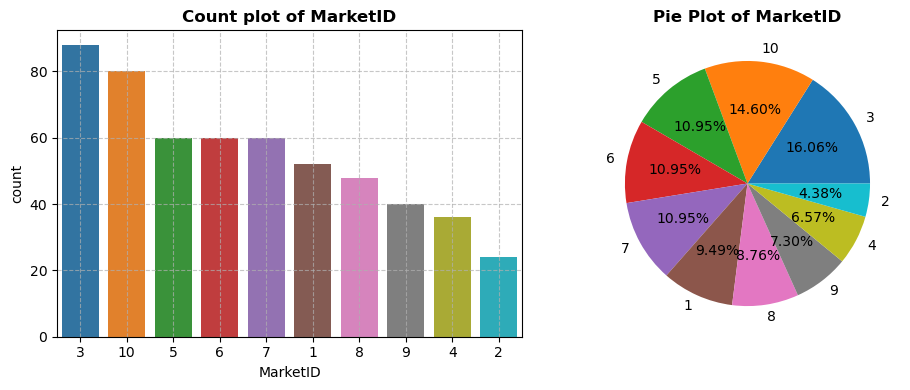

In [18]:
variable = "MarketID"

value = dataset["MarketID"].value_counts()/4
print("No. of store with respect to each market ID")
print(value)
# figure size
plt.figure(figsize = (10,4))


# Plot 1: Count Plot
plt.subplot(1,2,1)
sns.countplot(x = variable, data = dataset, order = dataset[variable].value_counts().index)
plt.grid(True, linestyle = "--", alpha = 0.7)
plt.title(f"Count plot of {variable}", fontweight = "bold")


# plt.subplot(1,2,1)
# plt.bar(x = dataset["MarketID"].value_counts().index, height = dataset[variable].value_counts()/4)
# plt.xticks(ticks = dataset[variable].unique())
# plt.yticks(ticks = np.arange(0,25,2))
# plt.title(f"Count Plot of {variable}", fontweight = "bold")

# Plot 2: Pie Plot
plt.subplot(1,2,2)
count_value = dataset[variable].value_counts()
plt.pie(x = count_value, labels = count_value.index, autopct = "%0.2f%%")
plt.title(f"Pie Plot of {variable}", fontweight = "bold")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

1. Highest promotions were in MarketID 3 with 88 total promotions in 4 weeks.
2. This was followed by MarketID 10 with 80 promotions
3. MarketID 5,6,7 had equal number of promotions ie. 60
4. Lowest promotions were in MarketID 2 

These promotions are in consistent with the number of store present in the MarketID provided with LocationID in the dataset.

#### 2. MarketSize


Medium    80.0
Large     42.0
Small     15.0
Name: MarketSize, dtype: float64


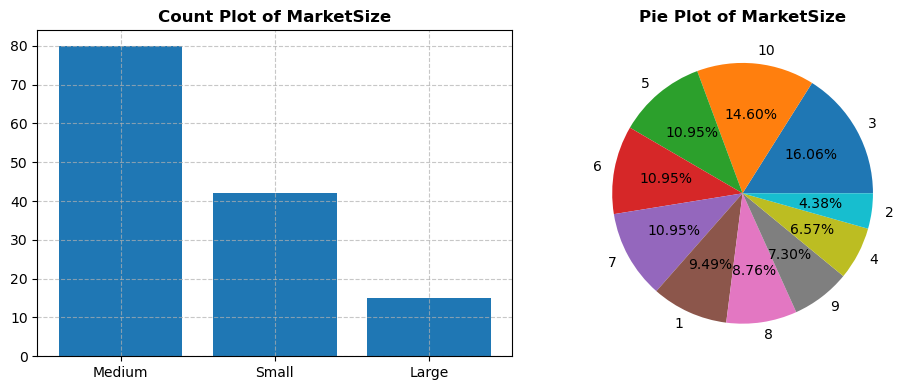

In [19]:
variable = "MarketSize"

value = dataset[variable].value_counts()/4
print(value)

# Figure size
plt.figure(figsize = (10,4))

# Plot 1: Count Plot
plt.subplot(1,2,1)
plt.bar(x = dataset[variable].unique(), height = value)
plt.grid(True, linestyle = "--", alpha = 0.7)
plt.title(f"Count Plot of {variable}", fontweight = "bold")

# Plot 2: Pie Plot
plt.subplot(1,2,2)
plt.pie(x = count_value, labels = count_value.index, autopct = "%0.2f%%", textprops = {"color":"black"})
plt.title(f"Pie Plot of {variable}", fontweight = "bold")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

We can see that Fast Food chain has most of its 

#### 3. LocationID

"LocationID" is store id for various store of fast food chain, hence we are droping it.

In [24]:
# dataset.drop(labels = "LocationID", axis = 1,inplace = True)

#### 3. Age of Store 

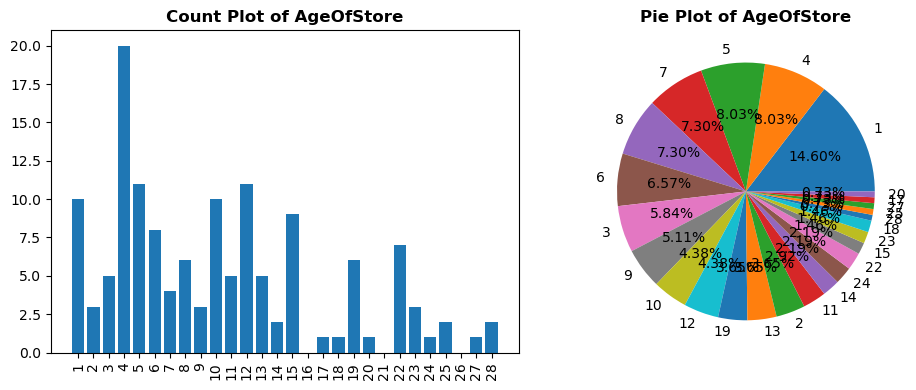

In [25]:
variable = "AgeOfStore"

count_value = dataset[variable].value_counts()/4

# Figure size
plt.figure(figsize = (10,4))

# Plot 1: Count Plot
plt.subplot(1,2,1)
plt.bar(x = dataset[variable].unique(), height = count_value)
plt.xticks(ticks = np.arange(1,29,1), rotation = 90)
# sns.countplot(x = variable, data = dataset, order = dataset[variable].value_counts().index)
plt.title(f"Count Plot of {variable}", fontweight = "bold")

# Plot 2: Pie Plot
plt.subplot(1,2,2)
plt.pie(x = count_value, labels = count_value.index, autopct = "%0.2f%%")
plt.title(f"Pie Plot of {variable}", fontweight = "bold")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [26]:
dataset["AgeOfStore"].describe()

count    548.000000
mean       8.503650
std        6.638345
min        1.000000
25%        4.000000
50%        7.000000
75%       12.000000
max       28.000000
Name: AgeOfStore, dtype: float64

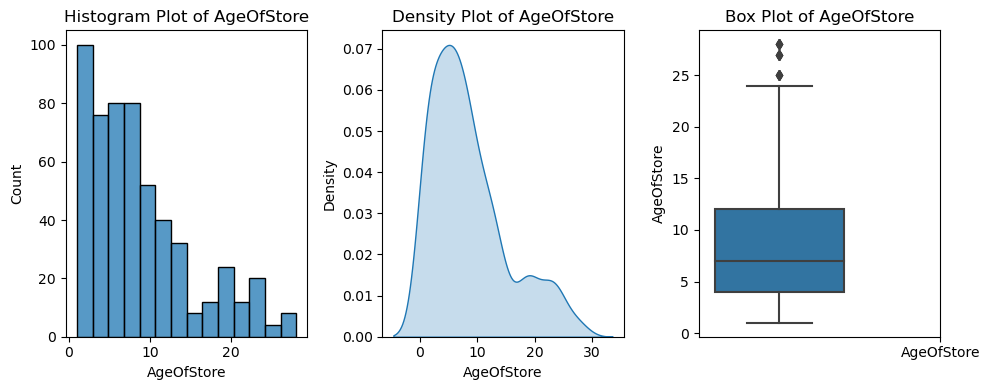

In [27]:
variable = "AgeOfStore"

# figure size
plt.figure(figsize = (10,4))

# Plot 1: Histogram Plot
plt.subplot(1,3,1)
sns.histplot(x = variable, data = dataset)
plt.title(f"Histogram Plot of {variable}")

# Plot 2: Density Plot
plt.subplot(1,3,2)
sns.kdeplot(x = variable, data = dataset, fill = True)
plt.title(f"Density Plot of {variable}")

# Plot 3: Box Plot
plt.subplot(1,3,3)
sns.boxplot(y = variable, data = dataset)
plt.xticks(ticks = [1], labels = ["AgeOfStore"])
plt.title(f"Box Plot of {variable}")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

#### 5. Promotion

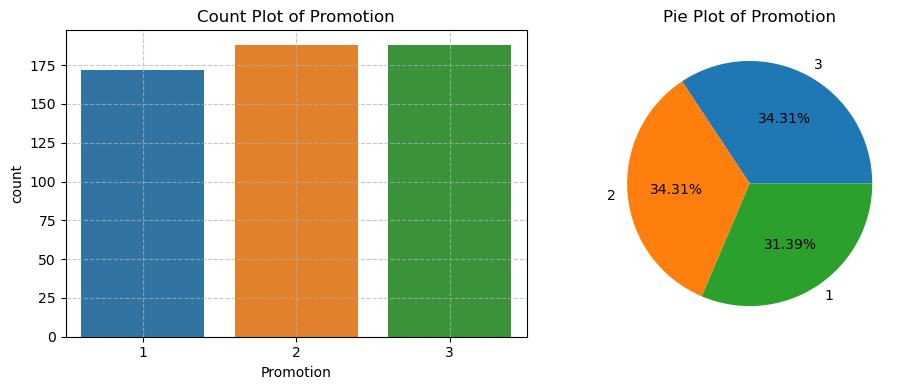

3    188
2    188
1    172
Name: Promotion, dtype: int64


In [28]:
variable = "Promotion"

# Plot figure
plt.figure(figsize = (10,4))

# Plot 1: Count Plot
plt.subplot(1,2,1)
sns.countplot(x = variable, data = dataset)
plt.grid(True, linestyle = "--", alpha = 0.7)
plt.title(f"Count Plot of {variable}")

# Plot 2: Pie Plot 
plt.subplot(1,2,2)
value_count = dataset[variable].value_counts()
plt.pie(x = value_count, labels = value_count.index, autopct = "%0.2f%%")
plt.title(f"Pie Plot of {variable}")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

print(value_count)

1. Promotion 1 was used for 172 times
2. Promotion 2 and 3 were used more and equally ie. 188 times

#### 4. Sales In Thousands

In [29]:
# Checking the basis statistics 
dataset["SalesInThousands"].describe()

count    548.000000
mean      53.466204
std       16.755216
min       17.340000
25%       42.545000
50%       50.200000
75%       60.477500
max       99.650000
Name: SalesInThousands, dtype: float64

We can see that the mean is \\$50 for a particular week with \\$99.65 being the highest sales being recorded for a store. 

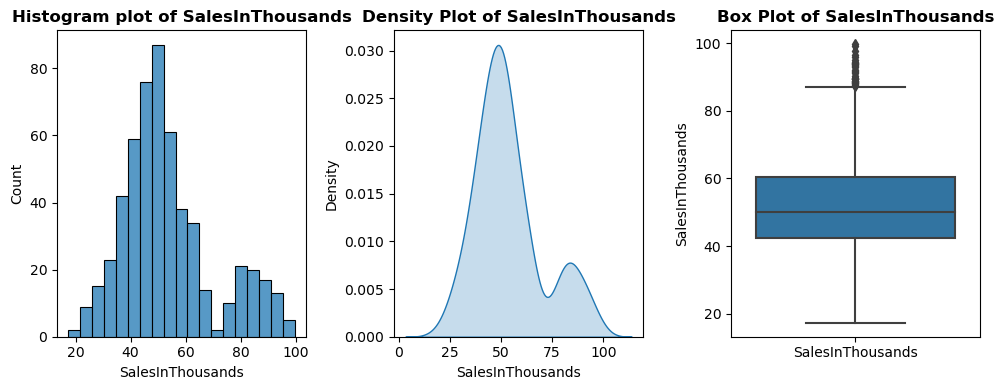

In [30]:
variable = "SalesInThousands"

# figure 
fig, axs = plt.subplots(1,3, figsize = (10,4))

# Plot 1: Histogram Plot 
sns.histplot(x = variable, data = dataset, ax = axs[0])
axs[0].set_title(f"Histogram plot of {variable}", fontweight = "bold")

# Plot 2: Density Plot
sns.kdeplot(x = variable, data = dataset, ax = axs[1], fill = True)
axs[1].set_title(f"Density Plot of {variable}", fontweight = "bold")

# Plot 3: Box Plot
sns.boxplot(y = variable, data = dataset, ax = axs[2])
axs[2].set_xticks(ticks = [0], labels = ["SalesInThousands"])
axs[2].set_title(f"Box Plot of {variable}", fontweight = "bold")

# Adjust layout 
plt.tight_layout()

# Show plot
plt.show()

1. Feature "SalesInThousands" is not normaly distributed, but that can be further checked using statistical test.
2. We have some outliers in the dataset, this might be true because of the either store being too old and thus popular 

## Bivariate Analysis

We will be plotting various columns against the data present in feature "SalesInThousands" and "AgeOfStore" to draw some conclusions about their relations.

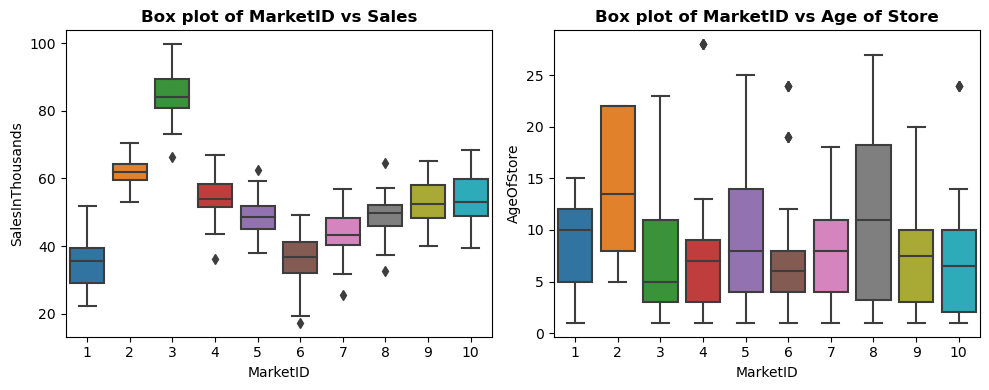

In [31]:
# Plotting MarketID vs Sales in thousands and Age of Store

# figure and axes
fig, axs = plt.subplots(1, 2, figsize = (10,4))

# Plot 1: Box plot of MarketID against SalesInThousands
sns.boxplot(x = "MarketID", y = "SalesInThousands", data = dataset, ax = axs[0])
axs[0].set_title(f"Box plot of MarketID vs Sales", fontweight = "bold")

# Plot 2: Box Plot of MarketID vs AgeOfStore
sns.boxplot(x = "MarketID", y = "AgeOfStore", data = dataset, ax = axs[1])
axs[1].set_title(f"Box plot of MarketID vs Age of Store", fontweight = "bold")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

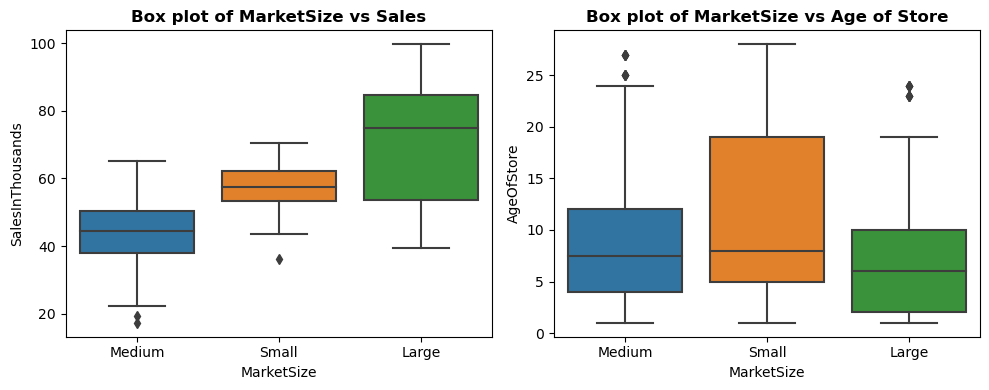

In [32]:
# Plotting MarketSize vs Age of Store and Sales in Thousand
variable = "MarketSize"
# figure and axes
fig, axs = plt.subplots(1, 2, figsize = (10,4))

# Plot 1: Box plot of MarketID against SalesInThousands
sns.boxplot(x = variable, y = "SalesInThousands", data = dataset, ax = axs[0])
axs[0].set_title(f"Box plot of {variable} vs Sales", fontweight = "bold")

# Plot 2: Box Plot of MarketID vs AgeOfStore
sns.boxplot(x = variable, y = "AgeOfStore", data = dataset, ax = axs[1])
axs[1].set_title(f"Box plot of {variable} vs Age of Store", fontweight = "bold")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


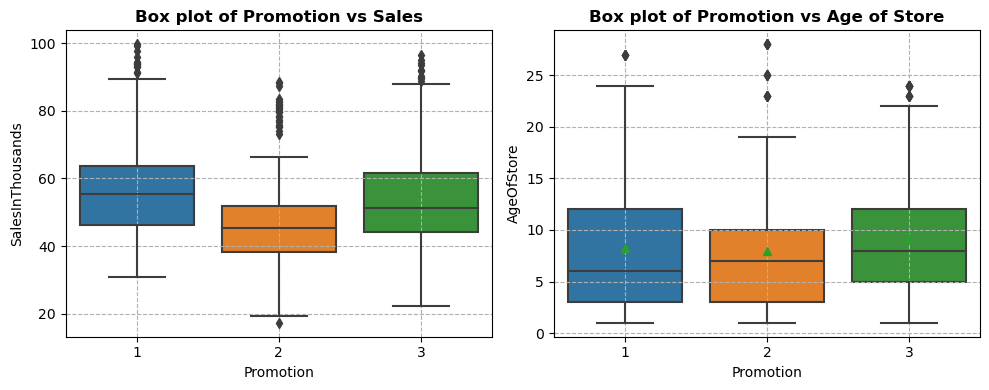

In [33]:
# Plotting Promotions vs Age of Store and Sales in Thousand
variable = "Promotion"

# figure and axes
fig, axs = plt.subplots(1, 2, figsize = (10,4))

# Plot 1: Box plot of MarketID against SalesInThousands
sns.boxplot(x = variable, y = "SalesInThousands", data = dataset, ax = axs[0])
axs[0].set_title(f"Box plot of {variable} vs Sales", fontweight = "bold")
axs[0].grid(True, linestyle = "--")

# Plot 2: Box Plot of MarketID vs AgeOfStore
sns.boxplot(x = variable, y = "AgeOfStore", data = dataset, ax = axs[1],showmeans = True)
axs[1].set_title(f"Box plot of {variable} vs Age of Store", fontweight = "bold")
axs[1].grid(True, linestyle = "--")


# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


###### <ins>Observations<ins>
    
    <ins> Promotion vs Sales<ins>
    1. 

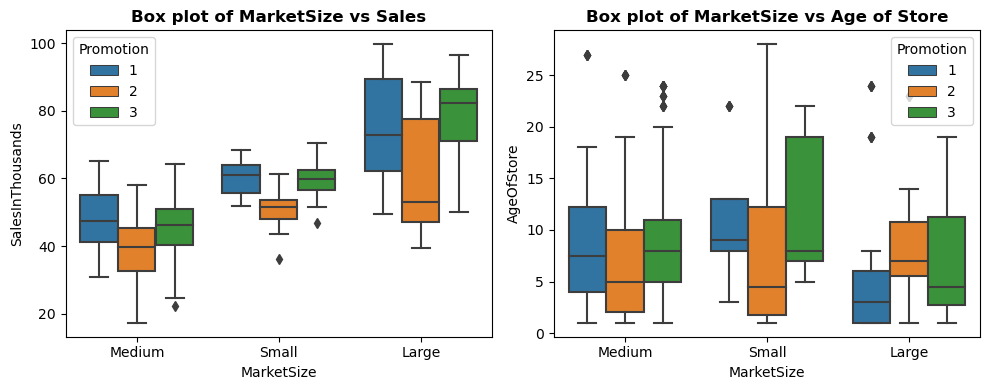

In [34]:
# Plotting MarketSize vs Age of Store and Sales in Thousand
variable = "MarketSize"
# figure and axes
fig, axs = plt.subplots(1, 2, figsize = (10,4))

# Plot 1: Box plot of MarketID against SalesInThousands
sns.boxplot(x = variable, y = "SalesInThousands", data = dataset, ax = axs[0], hue = "Promotion")
axs[0].set_title(f"Box plot of {variable} vs Sales", fontweight = "bold")

# Plot 2: Box Plot of MarketID vs AgeOfStore
sns.boxplot(x = variable, y = "AgeOfStore", data = dataset, ax = axs[1],hue = "Promotion")
axs[1].set_title(f"Box plot of {variable} vs Age of Store", fontweight = "bold")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

In [35]:
dataset.columns

Index(['MarketID', 'MarketSize', 'AgeOfStore', 'Promotion',
       'SalesInThousands'],
      dtype='object')

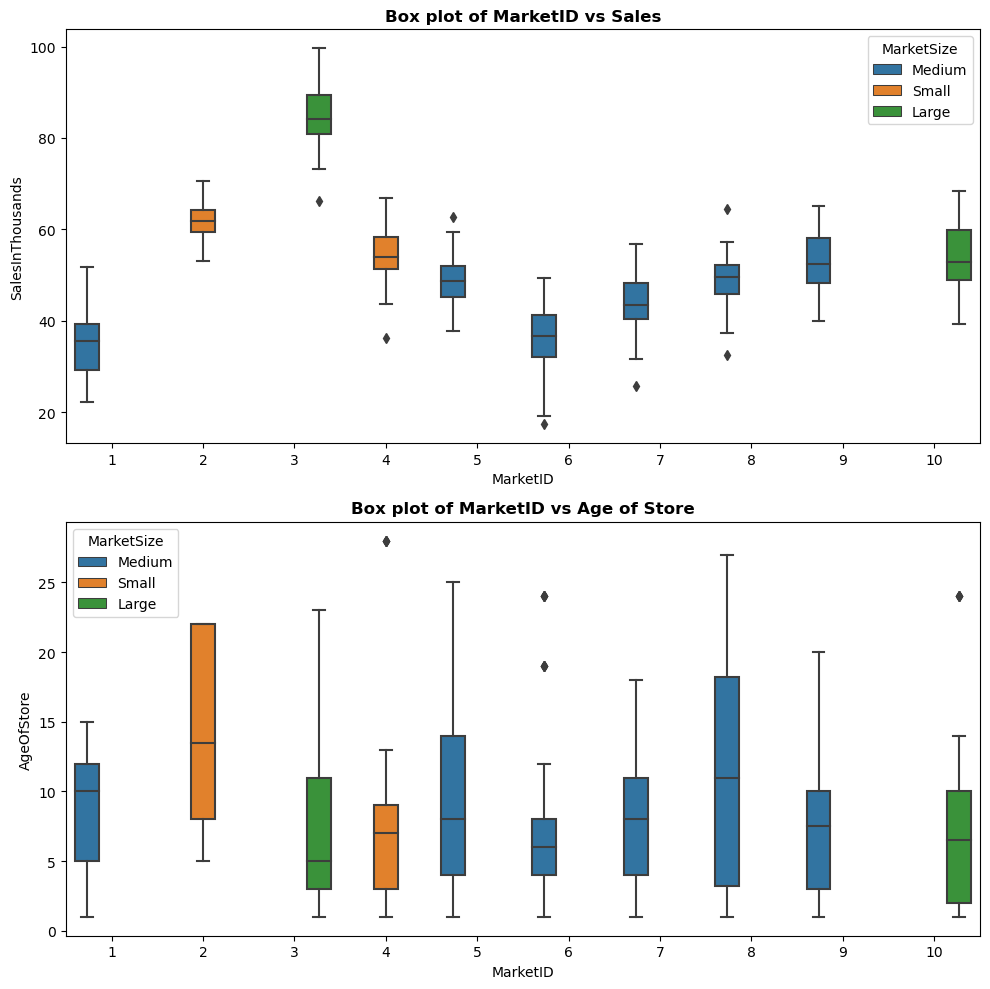

In [36]:
# Plotting MarketID vs Sales in thousands and Age of Store

# figure and axes
fig, axs = plt.subplots(2, 1, figsize = (10,10))

# Plot 1: Box plot of MarketID against SalesInThousands
sns.boxplot(x = "MarketID", y = "SalesInThousands", data = dataset, ax = axs[0], hue = "MarketSize")
axs[0].set_title(f"Box plot of MarketID vs Sales", fontweight = "bold")

# Plot 2: Box Plot of MarketID vs AgeOfStore
sns.boxplot(x = "MarketID", y = "AgeOfStore", data = dataset, ax = axs[1], hue = "MarketSize")
axs[1].set_title(f"Box plot of MarketID vs Age of Store", fontweight = "bold")

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

# Statistica Test 

#### <ins>Null hypothesis H0 : -  <ins> SP1 == SP2 == SP3
    
        Null Hypothessis states that there is no statistical significance on the Sales of the Fast Food Chain because of the different promotions (SP1 , SP2 and SP3).
    

#### <ins>Alternate Hypothesis H1 : - <ins> SP1 != SP2 != SP3
    
    Alternate Hypothesis states that there is a satistical significancy on the Sales of the Fast Food Chain's store because of the promotions, being used in specific market and store.
    
#### Significance value ($\alpha$) = 0.05
    Here we have defined significance value to be 0.05.

#### Steps to be followed
    - First we will check following assumption
        - Assumption of Normality - Shapiro Wilk Test 
        - Assumption of Equal Variance - Levene's Test 
    - Depending on the result of the above test we will decide the statistical test to be performed 
        - If assumption of normality and equal varaince is statisfied we can perform Annova Test.
        - If assumption of normality is not statisfied we will have to perform non-parametric Kruskal-Wallis Test.
    - Provide conclusions of the statistical test performed. 
    - Repeat the steps for other features present in the dataset.

###### Assumption of Normality
    H0 : Normality assumption is statisfied 
    H1 : Normality assumption is not statisfied 
   
We will be taking significance value($\alpha$) to be 0.05 for performing Shapiro-Wilk test for checking normality of the dataset between various Promotions done by the Fast Food Chain client. 

If the value is lower than 0.05 we will have to reject the null hypothesis H0.

In [61]:
# Check for assumption of normalilty

for i in dataset["Promotion"].unique():
    shapiro_stat, shapiro_p_value = shapiro(dataset[dataset["Promotion"]==i]["SalesInThousands"])
    print(f"Shapiro Wilk Test for Normality (Promotion {i}): p-value = {shapiro_p_value:.5f}")

Shapiro Wilk Test for Normality (Promotion 3): p-value = 0.00000
Shapiro Wilk Test for Normality (Promotion 2): p-value = 0.00000
Shapiro Wilk Test for Normality (Promotion 1): p-value = 0.00000


As we can see that p-value for all the promotions are less than significance value ($\alpha$) we will have to reject the null hypothesis. 

i.e. Data is not normally distributed and assumption of normality is not statisfied.

###### Assumption of Equal Variance
    H0 : Equal Variance Assumption is statisfied.
    H1 : Equal Variance Assumption is not statisfied.
    
We will be taking significance value($\alpha$) to be 0.05 for performing Levene's Test for checking equal variance in dataset between various Promotions done by the Fast Food Chain client. 

If the value is lower than 0.05 we will have to reject the null hypothesis H0.

In [46]:
# check for equal variance 
levene_stats, levene_p_value = levene(dataset[dataset["Promotion"]==1]["SalesInThousands"],
                                     dataset[dataset["Promotion"]==2]["SalesInThousands"],
                                     dataset[dataset["Promotion"]==3]["SalesInThousands"])

print(f"Levene Test for equality of variance for Promotions is: \n\nTest statistics : {levene_stats} and p-value: {levene_p_value}")

Levene Test for equality of variance for Promotions is: 

Test statistics : 1.2696787527507418 and p-value: 0.2817514565692118


We can see that p-value for Levene's test is greater than the significance value ($\alpha$) 0.05. Thus the data has equal variance. 

We will be accepting the Null Hypothesis.

####  Selection of Statistical Test

As we failed to statisfy the assumption of normality for the dataset, we will have to perform the non-parametric test ie Kruskal-Wallis Test.

In [66]:
from scipy.stats import kruskal

kruskal_stats, kruskal_p_value = kruskal(dataset[dataset["Promotion"] == 1]["SalesInThousands"],
                                        dataset[dataset["Promotion"] == 2]["SalesInThousands"],
                                        dataset[dataset["Promotion"] == 3]["SalesInThousands"])

print(f"Statistical Test of Krushkal-Wallis Test is : Test Statistics {kruskal_stats} and p-value {kruskal_p_value:.5f}")

Statistical Test of Krushkal-Wallis Test is : Test Statistics 53.29475169322799 and p-value 0.00000


We can see that the p-value of the Krushkal_Wallis Test is less than the defined significance value ($\alpha$) of 0.05.

Hence, we will have to reject the Null Hypothesis(H0). 

<ins>Therefore, there is a significance of the Promotions being used by the Fast Food Chain. 

In [44]:
dataset.columns

Index(['MarketID', 'MarketSize', 'AgeOfStore', 'Promotion',
       'SalesInThousands'],
      dtype='object')